# Computer Vision Day 3 - Transfer Learning
This notebook is similar to the [notebook for Day 1](https://github.com/Digital-Health-UMCU/tensorflow_demo/blob/main/1_intro.ipynb), except that this time we will train a CNN on CIFAR10 images.

### How to use it?
Just press the button below and get started!

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/Digital-Health-UMCU/tensorflow_demo/blob/main/3_transfer_learning.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/Digital-Health-UMCU/tensorflow_demo/blob/main/3_transfer_learning.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In [8]:
import tensorflow as tf
print(f"TensorFlow version: {tf.__version__}")
print(f"GPU (empty list = no GPU available): {tf.config.list_physical_devices('GPU')}")

TensorFlow version: 2.6.0
GPU (empty list = no GPU available): [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Load dataset
Load and prepare the [cifar10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset. Convert the samples from integers to floating-point numbers.

In [3]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print(x_train.shape)

(50000, 32, 32, 3)


## Create a model
For available layers in Keras see [here](https://www.tensorflow.org/api_docs/python/tf/keras/layers).
It is easiest to use a softmax activation in the last layer for multiclass classification problems. However, while using the softmax activition makes the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models whenusing a softmax output. 
Alternatively you can use a linear activation in the last layer and then apply `tf.nn.softmax(...)` on the predictions.

### Pre-trained models
For this you can checkout [TensorFlow Hub](https://www.tensorflow.org/hub) or use `tf.keras.applications`.

Don't forget to freeze the layers and check that explicitly

In [ ]:
# Create a CNN
model = tf.keras.models.Sequential([
  ...
])

In [30]:
#@title Example Model

# Example convolutional neural network.
# model = tf.keras.models.Sequential([
#   tf.keras.layers.InputLayer(input_shape=(32,32,3)),
#   tf.keras.layers.ZeroPadding2D((96, 96)),
#   tf.keras.applications.MobileNetV3Small(
#     include_top=False,
#     weights="imagenet",
#     input_shape=(224, 224, 3)
# ),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(10, activation='softmax')
# ])

# for layer in model.layers[:-1]:
#   layer.trainable=False # Freeze Mobilenet
# for layer in model.layers:
#   print(layer.trainable)

False
False
False
True


The `losses.SparseCategoricalCrossentropy` loss takes a vector of logits and a `True` index and returns a scalar loss for each example.

In [18]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

In [19]:
# Transfer model
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_4 (ZeroPaddin (None, 224, 224, 3)       0         
_________________________________________________________________
MobilenetV3small (Functional (None, 1, 1, 1024)        1529968   
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 1,540,218
Trainable params: 1,528,106
Non-trainable params: 12,112
_________________________________________________________________


Next, fit the model parameters using the `model.fit` method.

In [ ]:
# Fit the CNN
model.fit(..., 
          ..., 
          epochs=...
          )

In [21]:
#@title Example Fit

# model.fit(x_train, y_train, 
#           epochs=20, 
#           validation_split=0.2,
#           callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
#                                                           factor=0.1, 
#                                                           patience=2),
#                     tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
#                                                       patience=4,
#                                                       restore_best_weights=True),
#                     ])

Epoch 1/20
 502/1250 [===========>..................] - ETA: 1:29 - loss: 1.6447 - accuracy: 0.3988

KeyboardInterrupt: ignored

The `Model.evaluate` method checks the models performance.

In [ ]:
print(f"Dense model: {model_dense.evaluate(x_test,  y_test, verbose=2)}")
print(f"CNN: {model.evaluate(x_test,  y_test, verbose=2)}")

## Look at some predictions
Class names for cifar10 can be found [here](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data).

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [23]:
# Get predictions
preds_test = model.predict(x_test).argmax(axis=1)

# define class names
class_names = {0: 'airplane',
               1:	'automobile',
               2:	'bird',
               3:	'cat',
               4:	'deer',
               5:	'dog',
               6:	'frog',
               7:	'horse',
               8:	'ship',
               9:	'truck'}

Look at some examples and plot the confusion matrix.

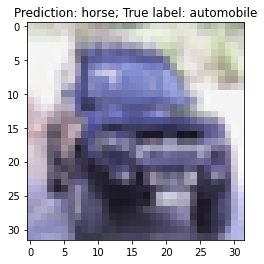

In [27]:
index = 9
plt.title(f"Prediction: {class_names[preds_test[index]]}; True label: {class_names[y_test.ravel()[index]]}")
plt.imshow(x_test[index])

In [28]:
keys = [k for k in class_names.keys()]
names = [v for v in class_names.values()]
cm = confusion_matrix(y_test.ravel(), preds_test, labels = keys)

plt.figure(figsize=(10, 10))
ax = plt.subplot()
ConfusionMatrixDisplay(cm, display_labels=names).plot(values_format='d', ax=ax)
plt.show()

ValueError: ignored